In [2]:
import cv2
import numpy as np

In [173]:
!wget https://thumbs.dreamstime.com/b/green-grass-13444388.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Large_Scaled_Forest_Lizard.jpg/1600px-Large_Scaled_Forest_Lizard.jpg

--2022-02-09 13:45:02--  https://thumbs.dreamstime.com/b/green-grass-13444388.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169732 (166K) [image/jpeg]
Saving to: ‘green-grass-13444388.jpg.1’

green-grass-1344438 100%[===================>] 165.75K  --.-KB/s    in 0.03s   

2022-02-09 13:45:02 (5.44 MB/s) - ‘green-grass-13444388.jpg.1’ saved [169732/169732]

--2022-02-09 13:45:02--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Large_Scaled_Forest_Lizard.jpg/1600px-Large_Scaled_Forest_Lizard.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 2620:0:861:ed1a::2:b, 208.80.154.240
Connecting to upload.wikimedia.org (upload.wikimedia.org)|2620:0:861:ed1a::2:b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394523 (385K) [image/jpeg]
Saving to: ‘1600px-Large_Scaled_

In [175]:
!wget http://clipart-library.com/images/6Tp5kekyc.jpg

--2022-02-09 13:47:01--  http://clipart-library.com/images/6Tp5kekyc.jpg
Resolving clipart-library.com (clipart-library.com)... 148.251.41.80
Connecting to clipart-library.com (clipart-library.com)|148.251.41.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37481 (37K) [image/jpeg]
Saving to: ‘6Tp5kekyc.jpg’

6Tp5kekyc.jpg       100%[===================>]  36.60K  --.-KB/s    in 0.1s    

2022-02-09 13:47:02 (300 KB/s) - ‘6Tp5kekyc.jpg’ saved [37481/37481]



In [176]:
img = cv2.imread("6Tp5kekyc.jpg")
print("ORIGNAL IMAGE: ", img.shape)
img = np.pad(img, ((2, 2), (2,2), (0, 0)), 'constant', constant_values=(0))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kern = np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])

ORIGNAL IMAGE:  (600, 800, 3)


In [177]:
import numpy as np

blurred = np.full(img.shape, -1)

for row in range(2, img.shape[0]-2):
    for col in range(2, img.shape[1]-2):
        blob = img[row-2:row+3, col-2:col+3]
        gauss = (blob*kern)
        blurred[row][col] = ((1/np.sum(kern))*np.sum(gauss))
        
print("BLURRED IMAGE: ", blurred.shape)

BLURRED IMAGE:  (604, 804)


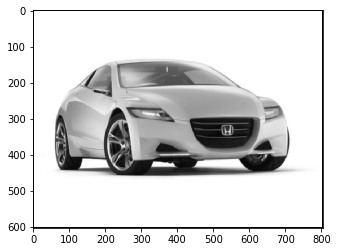

In [178]:
plt.imshow(blurred, cmap='gray', vmin = 0, vmax = 255,interpolation='none')

In [179]:
x_sobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
y_sobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

int_grad = np.full((blurred.shape[0], blurred.shape[1], 2), -1)

theta_bin = lambda x: 0 if (x>0 and x<22.5) else (45 if (x>22.5 and x<67.5) else (90 if (x>67.5 and x<112.5) else 135))
for row in range(2, img.shape[0]-2):
    for col in range(2, img.shape[1]-2):
        blob = img[row-1:row+2, col-1:col+2]
        G_x = np.sum(blob * x_sobel)
        G_y = np.sum(blob * y_sobel)
        G = np.sqrt(G_x**2+G_y**2)
        theta = theta_bin(np.arctan2(G_y, G_x)%157.5)
        int_grad[row][col]=[G, theta]
        
print("INTENSITY IMAGE: ", int_grad.shape)

INTENSITY IMAGE:  (604, 804, 2)


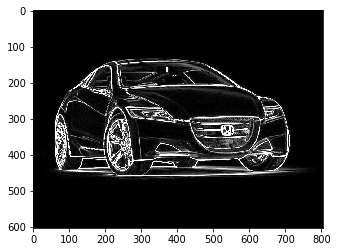

In [180]:
plt.imshow(int_grad[0:, 0:, 0], cmap='gray', vmin = 0, vmax = 255, interpolation='none')

In [181]:
lower_bounding = np.full((int_grad.shape[0], int_grad.shape[1]), -1)

for row in range(2, int_grad.shape[0]-2):
    for col in range(2, int_grad.shape[1]-2):
        G, theta = int_grad[row][col]
        if theta == 0:
            neighbors = [
                int_grad[row][col-1][0],
                int_grad[row][col+1][0]
            ]
        elif theta == 90:
            neighbors = [
                int_grad[row-1][col][0],
                int_grad[row+1][col][0]
            ]
        elif theta == 135:
            neighbors = [
                int_grad[row-1][col-1][0],
                int_grad[row+1][col+1][0]
            ]
        elif theta == 135:
            neighbors = [
                int_grad[row+1][col+1][0],
                int_grad[row-1][col-1][0]
            ]
        if G > max(neighbors):
            G = 0
        lower_bounding[row][col]=G
        
print("LOWER BOUNDING IMAGE: ", lower_bounding.shape)

LOWER BOUNDING IMAGE:  (604, 804)


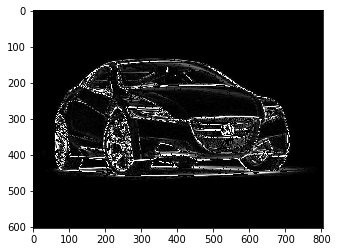

In [182]:
plt.imshow(lower_bounding, cmap='gray', vmin = 0, vmax = 255, interpolation='none')

In [183]:
double_thresh = np.full((lower_bounding.shape[0], lower_bounding.shape[1], 2), -1)
strong = 50
weak = 30
for row in range(2, lower_bounding.shape[0]-2):
    for col in range(2, lower_bounding.shape[1]-2):
        G = lower_bounding[row][col]
        if G > strong:
            double_thresh[row][col]=[G, 2]
        elif G > weak:
            double_thresh[row][col]=[G,1]
        else: 
            double_thresh[row][col]=[G,0]
            
print("DOUBLE THRESHOLD IMAGE: ", double_thresh.shape)

DOUBLE THRESHOLD IMAGE:  (604, 804, 2)


In [184]:
hysteresis = np.full((double_thresh.shape[0], double_thresh.shape[1]), -1)
double_thresh = np.pad(double_thresh, ((2, 2), (2,2), (0,0)), 'constant', constant_values=(0))

for row in range(4, double_thresh.shape[0]-4):
    for col in range(4, double_thresh.shape[1]-4):
        G, conf = double_thresh[row][col]
        if conf == 2:
            hysteresis[row][col]=G
        elif conf == 1:
            blob = double_thresh[row-4:row+5, col-4:col+5]
            add = False
            for element in blob.reshape(81,2):
                if (element[1]==2):
                    add=True
                    break
            if add:
                hysteresis[row][col]=G
            else:
                hysteresis[row][col]=0
        else:
            hysteresis[row][col]=0
            
print("HYSTERESIS IMAGE: ", hysteresis.shape)

HYSTERESIS IMAGE:  (604, 804)


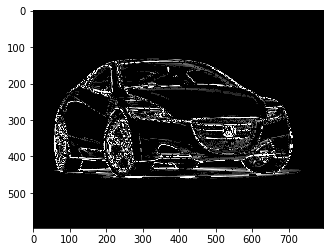

In [185]:
plt.imshow(hysteresis[4:-4, 4:-4], cmap='gray', vmin = 0, vmax = 255, interpolation='none')

In [186]:
np.sum(hysteresis)/(hysteresis.shape[0]*hysteresis.shape[1])

18.460742644393925

In [191]:
edge = cv2.Canny(img, 10, 255)